## Component 2 Coding :  Understanding AI assignment

In [1]:
# Importing Libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_mutual_info_score 
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score 
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split # sci-kit Learn Library
from sklearn.preprocessing import StandardScaler # to rescaLe the numericaL data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression # importing the Linear regression Libr 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # importin


### Sourcing the dataframe 

In [2]:
df = pd.read_csv("Video_Games.csv")
# display the data
df. shape

(16719, 16)

### Accessing the dataframe for irregularities

In [3]:
#checking for null values 
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checking for more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
#Observing the inconsistency above in User score coLumn 
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Technical Cleaning operation begins

In [7]:
#Resolving the inconsistency and data type of the coLumn
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = df['User_Score'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [9]:
#To inspect the mean,median,std and other values 
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [10]:
df.isna().sum() # Checking the dataframe again

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
#Checking for dupLicates 
df.duplicated().sum()

0

In [12]:
# Dropping the two rows with nuLL values in Name Column
del_indexOne = df[ df['Name'].isna() ].index 
df.drop(del_indexOne, inplace=True)

In [13]:
# Replacing the nuLL vaLues with the mean, median caLcuLated 
df['Critic_Score'].replace(np.nan, '69', inplace= True) 
df['Critic_Count'].replace(np.nan, '21', inplace= True) 
df['User_Count'].replace(np.nan, '24', inplace= True) 
df['User_Score'].replace(np.nan, '7.5', inplace= True)

In [14]:
# Replace null vaLues in the publisher columnn with Unknown-PubLisher 
df['Publisher'].replace (np.nan, 'Unknown-Publisher', inplace= True)

In [15]:
# Replace null vaLues in developer column with PubLisher because they are most times the same
df.loc[df['Developer'].isna(), 'Developer'] = df['Publisher']

In [16]:
# Replace null vaLues in developer column with Unknown-Developer 
df['Developer'].replace(np.nan, 'Unknown-Developer', inplace= True)

In [17]:
df.head(5027)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,21,7.5,24,Nintendo,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,21,7.5,24,Nintendo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,MX vs. ATV Untamed,PS2,2007.0,Racing,THQ,0.32,0.01,0.00,0.05,0.38,53.0,13.0,8.2,5.0,Rainbow Studios,E
5024,Rogue Trip: Vacation 2012,PS,1998.0,Racing,GT Interactive,0.21,0.14,0.00,0.02,0.38,69,21,7.5,24,GT Interactive,NaN
5025,Phantasy Star Ø,DS,2008.0,Role-Playing,Sega,0.16,0.00,0.20,0.01,0.38,69,21,7.5,24,Sega,NaN
5026,Dawn of Discovery,PC,2009.0,Simulation,Ubisoft,0.00,0.32,0.00,0.06,0.38,82.0,32.0,8.8,132.0,"Blue Byte, Related Designs",T


In [18]:
df.query(''' `Name`.str.strip() == 'Phantasy Star Ø' ''')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5025,Phantasy Star Ø,DS,2008.0,Role-Playing,Sega,0.16,0.0,0.2,0.01,0.38,69,21,7.5,24,Sega,NaN


### Checking the dataframe again

In [19]:
df.isna().sum() # Checking the dataframe again

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating             6767
dtype: int64

### Converting the datatype of Year of Release to int

In [20]:
# Converting the datatype of Year of Release to float 
df['Year_of_Release'] = df['Year_of_Release'].astype(float)

In [21]:
df['Year_of_Release'].replace (np.nan, '2007', inplace= True)

In [22]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

### Replacing the null value in Rating with 'E'

In [23]:
df['Rating'].replace (np.nan, 'E', inplace= True)

In [24]:
# check for any empty space in Year_of_Release
df.query(''' `Year_of_Release` == ' ' ''')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [25]:
# query the original dataframe to get the Year_of_Release that have NaN values
df.query(''' `Year_of_Release`.isna() ''')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [26]:
df.isna().sum() # Checking the dataframe again

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### Converting the datatype of Critic and User_Scores and User_Counts all to float to be useful

In [27]:
# Converting the datatype of Critic and User_Scores and User_Counts all to float 
df['Critic_Score'] = df['Critic_Score'].astype(float) 
df['Critic_Count'] = df['Critic_Count'].astype(float) 
df['User_Score'] = df['User_Score'].astype(float) 
df['User_Count'] = df['User_Count'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  int32  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.6+ MB


In [29]:
df_numeric = df.select_dtypes(exclude = "object")

<Axes: >

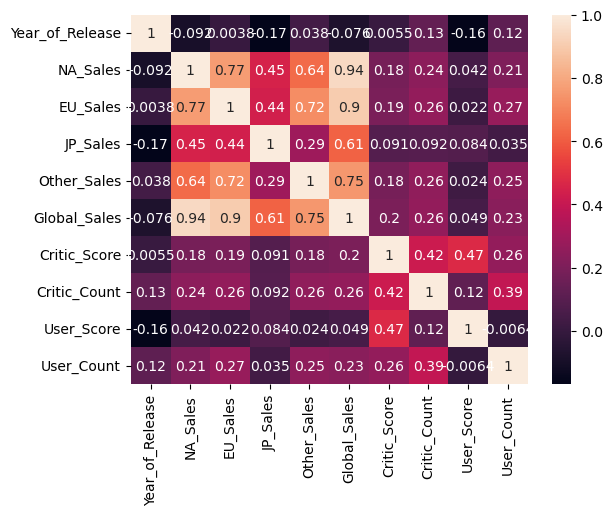

In [30]:
#Checking the correLation between the columns 
plt.figure(dpi=100)
sns.heatmap(df_numeric.corr(), annot = True)

### (a) Checking which variables/columns in the video game dataset or a combination of them best predicts "global sales"


In [31]:
# Split data into input and output variables represented as X and y
X = df_numeric.drop(['Global_Sales'], axis = 1)
y = df_numeric['Global_Sales'] # value to be predicted

In [32]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the dataset

In [33]:
#To use reguLarization, we can appLy StandardScaLer 
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [34]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

### Checking North America Sales against Global Sales

In [35]:
X_train_scaled['NA_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['NA_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['NA_Sales'].to_numpy().reshape(-1,1)
NA_Sales = LinearRegression() # fitting the modeL to a dataset using the LinearRegression
# Train the modeL using the training sets
NA_Sales.fit(X_train_scaled_yt,y_train)
intercept = NA_Sales.intercept_
coefficient = NA_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*NA_Sales'.format(intercept, coefficient[0])
Sales_pred = NA_Sales.predict(X_test_scaled_yt)
# The mean absolute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is :{np.sqrt(mean_squared):.2f}")
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.20
The result of the mean squared error is : 0.29
The result of the root mean squared error is :0.54
The result of the coefficient of determination is: 0.93


### Checking EU Sales against Global sales

In [36]:
X_train_scaled['EU_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['EU_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['EU_Sales'].to_numpy().reshape(-1,1)
EU_Sales =LinearRegression() # fitting the modeL to a dataset using the LinearRegression
# Train the modeL using the training sets
EU_Sales.fit(X_train_scaled_yt,y_train)
intercept = EU_Sales.intercept_
coefficient = EU_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*EU_Sales'.format(intercept, coefficient[0])
Sales_pred = EU_Sales.predict(X_test_scaled_yt)
# The mean absoLute error
mean_abs = mean_absolute_error(y_test, Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.24
The result of the mean squared error is : 0.30
The result of the root mean squared error is : 0.55
The result of the coefficient of determination is: 0.93


### Checking Japan sales against Global sales

In [37]:
X_train_scaled['JP_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['JP_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['JP_Sales'].to_numpy().reshape(-1,1)
JP_Sales = LinearRegression() # fitting the modeL to a dataset using the LinearRegression
# Train the modeL using the training sets
JP_Sales.fit(X_train_scaled_yt,y_train)
intercept = JP_Sales.intercept_
coefficient = JP_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*JP_Sales'.format(intercept, coefficient[0])
Sales_pred = JP_Sales.predict(X_test_scaled_yt)
# The mean absoLute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.52
The result of the mean squared error is : 2.82
The result of the root mean squared error is : 1.68
The result of the coefficient of determination is: 0.32


### Checking Other sales against Global sales

In [38]:
X_train_scaled['Other_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['Other_Sales'].to_numpy().reshape(-1,1) 
X_test_scaled_yt = X_test_scaled['Other_Sales'].to_numpy().reshape(-1,1)
Other_Sales = LinearRegression() # fitting the modeL to a dataset using the LinearRegres
# Train the modeL using the training sets
Other_Sales.fit(X_train_scaled_yt,y_train)
intercept = Other_Sales.intercept_
coefficient = Other_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*Other_Sales'.format(intercept, coefficient[0])
Sales_pred = Other_Sales.predict(X_test_scaled_yt)
# The mean absoLute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.34
The result of the mean squared error is : 1.17
The result of the root mean squared error is : 1.08
The result of the coefficient of determination is: 0.72


In [39]:
X_train_scaled['Critic_Score'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['Critic_Score'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['Critic_Score'].to_numpy().reshape(-1,1)
Critic_Score = LinearRegression() # fitting the modeL to a dataset using the LinearRegrE .
# Train the modeL using the training sets
Critic_Score.fit(X_train_scaled_yt,y_train)
intercept = Critic_Score.intercept_
coefficient = Critic_Score.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*Critic_Score'.format(intercept, coefficient[0])
Sales_pred - Critic_Score.predict(X_test_scaled_yt)
# The mean absoLute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")


The result of the mean absolute error is: 0.34
The result of the mean squared error is : 1.17
The result of the root mean squared error is : 1.08
The result of the coefficient of determination is: 0.72


In [40]:
X_train_scaled['Critic_Count'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['Critic_Count'].to_numpy().reshape(-1,1) 
X_test_scaled_yt = X_test_scaled['Critic_Count'].to_numpy().reshape(-1,1)
Critic_Count = LinearRegression() # fitting the modeL to a dataset using the LinearRegrE
# Train the modeL using the training sets
Critic_Count.fit(X_train_scaled_yt,y_train)
intercept = Critic_Count.intercept_
coefficient = Critic_Count.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*Critic_Count'.format(intercept, coefficient[0])
Sales_pred = Critic_Count.predict(X_test_scaled_yt)
# The mean absolute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")


The result of the mean absolute error is: 0.58
The result of the mean squared error is : 3.90
The result of the root mean squared error is : 1.98
The result of the coefficient of determination is: 0.06


#### Using the same numerical values as source variable in Multiple Linear Regression (MLR) 

In [41]:
mlr_sales = LinearRegression()
# introduce the muLtipLe independent variables and train
mlr_sales.fit(X_train_scaled,y_train)
# test the modeL
sales_preds = mlr_sales.predict(X_test_scaled)
# evaLuate the performance of the modeL
mean_abs = mean_absolute_error(y_test,sales_preds) 
mean_squared = mean_squared_error(y_test,sales_preds)
print(f"The mean_absolute_error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is	{mean_squared:.2f}")
print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
# The coefficient of determination: 1 is perfect prediction 
print(f"The coefficient of determination is: {r2_score(y_test,sales_preds):.2f}")


The mean_absolute_error is: 0.00
The result of the mean squared error is	0.00
The root mean squared error is : 0.01
The coefficient of determination is: 1.00


In [42]:
# Keeping NA_SaLes','EU SaLes','JP SaLes as source variabLe to determine GlobaL sales 
mlr_sales = LinearRegression()
# introduce the muLtipLe independent variabLes and train
X_train_scaled_m = X_train_scaled[['NA_Sales','EU_Sales','JP_Sales']] 
X_test_scaled_m =  X_test_scaled[['NA_Sales','EU_Sales','JP_Sales']]
mlr_sales.fit(X_train_scaled_m,y_train)
# test the modeL
sales_preds = mlr_sales.predict(X_test_scaled_m)
# evaLuate the performance of the modeL
mean_abs = mean_absolute_error(y_test,sales_preds) 
mean_squared = mean_squared_error(y_test,sales_preds)
print(f"The mean_absolute_error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}") 
print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
# The coefficient of determination: 1 is perfect prediction 
print(f"The coefficient of determination is: {r2_score(y_test,sales_preds): f}")


The mean_absolute_error is: 0.02
The result of the mean squared error is : 0.00
The root mean squared error is : 0.07
The coefficient of determination is:  0.998965


### b) Checking the effect number of critics & users as well as what/how their review scores have on the sales of Video games in North America, EU and Japan


### For JP_Sales

In [43]:
# Getting the variables and the outcome
X = df[['User_Score','User_Count','Critic_Score','Critic_Count']]
y = df[['JP_Sales']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [45]:
# Using StandardScaler to regularise
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

### Using various regression techniques

In [46]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [47]:
# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

In [48]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [49]:
# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [50]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [51]:
# Decision Tree Regression
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

In [52]:
print("The Mean Squared Error for all the regressors\n")
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf)) 
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso)) 
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr)) 
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge)) 
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree)) 
print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred_mlr))

The Mean Squared Error for all the regressors

Random Forest Regression MSE: 0.0957834363863293
Lasso Regression MSE: 0.09557136078751914
Support Vector Regression MSE: 0.09597812116059622
Ridge Regression MSE: 0.09409070488948477
Decision Tree Regression MSE: 0.12042019271175836
Multiple Linear Regression MSE: 0.09409070365932497


In [53]:
print("Coefficient of determination for all the regressors\n") 
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf)) 
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso)) 
print("Support Vector Regression R2:", r2_score(y_test, y_pred_svr)) 
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge)) 
print("Decision Tree Regression R2:",r2_score(y_test, y_pred_tree)) 
print("Multiple Linear Regression R2:",r2_score(y_test, y_pred_mlr))

Coefficient of determination for all the regressors

Random Forest Regression R2: -0.002284686786507839
Lasso Regression R2: -6.55126458852795e-05
Support Vector Regression R2: -0.004321882102942265
Ridge Regression R2: 0.01542817591853729
Decision Tree Regression R2: -0.26008545619586787
Multiple Linear Regression R2: 0.015428188791016817


### For EU_Sales

In [54]:
# Getting the variables and the outcome
X = df[['User_Score','User_Count','Critic_Score','Critic_Count']]
y = df[['EU_Sales']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [56]:
# Using StandardScaler to regularise
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

### Using various regression techniques

In [57]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [58]:
# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

In [59]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [60]:
# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [61]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [62]:
# Decision Tree Regression
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

In [63]:
print("The Mean Squared Error for all the regressors\n")
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf)) 
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso)) 
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr)) 
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge)) 
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree)) 
print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred_mlr))

The Mean Squared Error for all the regressors

Random Forest Regression MSE: 0.46833939313800377
Lasso Regression MSE: 0.4745686177386363
Support Vector Regression MSE: 0.46612978811019573
Ridge Regression MSE: 0.4569305617271751
Decision Tree Regression MSE: 0.6101592370420299
Multiple Linear Regression MSE: 0.45693060123940354


In [64]:
print("Coefficient of determination for all the regressors\n") 
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf)) 
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso)) 
print("Support Vector Regression R2:", r2_score(y_test, y_pred_svr)) 
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge)) 
print("Decision Tree Regression R2:",r2_score(y_test, y_pred_tree)) 
print("Multiple Linear Regression R2:",r2_score(y_test, y_pred_mlr))

Coefficient of determination for all the regressors

Random Forest Regression R2: 0.03640989567427777
Lasso Regression R2: 0.023593508091388382
Support Vector Regression R2: 0.04095607216606978
Ridge Regression R2: 0.0598831230185245
Decision Tree Regression R2: -0.2553789228304051
Multiple Linear Regression R2: 0.05988304172364978


### For NA_Sales

In [65]:
# Getting the variables and the outcome
X = df[['User_Score','User_Count','Critic_Score','Critic_Count']]
y = df[['NA_Sales']]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [67]:
# Using StandardScaler to regularise
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

### Using various regression techniques

In [68]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [69]:
# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

In [70]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [71]:
# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [72]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [73]:
# Decision Tree Regression
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

In [74]:
print("The Mean Squared Error for all the regressors\n")
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf)) 
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso)) 
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr)) 
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge)) 
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree)) 
print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred_mlr))

The Mean Squared Error for all the regressors

Random Forest Regression MSE: 0.9846679056784772
Lasso Regression MSE: 0.992957902786185
Support Vector Regression MSE: 1.011410029514687
Ridge Regression MSE: 0.9732548725094292
Decision Tree Regression MSE: 1.1854794278260503
Multiple Linear Regression MSE: 0.973254864852971


In [75]:
print("Coefficient of determination for all the regressors\n") 
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf)) 
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso)) 
print("Support Vector Regression R2:", r2_score(y_test, y_pred_svr)) 
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge)) 
print("Decision Tree Regression R2:",r2_score(y_test, y_pred_tree)) 
print("Multiple Linear Regression R2:",r2_score(y_test, y_pred_mlr))

Coefficient of determination for all the regressors

Random Forest Regression R2: 0.046512173406840995
Lasso Regression R2: 0.03848468385517789
Support Vector Regression R2: 0.020616854398242457
Ridge Regression R2: 0.05756380627558255
Decision Tree Regression R2: -0.14794053567726562
Multiple Linear Regression R2: 0.05756381368959462


### For the purpose of Classification

In [76]:
# Changing all categoricaL variables to numericaL ones using LabeL encoding 
label_encoder = LabelEncoder()
df['Platform_Num'] = label_encoder.fit_transform(df['Platform']) 
df['Rating_Num'] = label_encoder.fit_transform(df['Rating']) 
df['Genre_Num'] = label_encoder.fit_transform(df['Genre'])

In [77]:
df_numeric = df.select_dtypes(exclude = "object")
df_numeric

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_Num,Rating_Num,Genre_Num
0,2006,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,26,1,10
1,1985,29.08,3.58,6.81,0.77,40.24,69.0,21.0,7.5,24.0,11,1,4
2,2008,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,26,1,6
3,2009,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,26,1,10
4,1996,11.27,8.89,10.22,1.00,31.37,69.0,21.0,7.5,24.0,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2016,0.00,0.00,0.01,0.00,0.01,69.0,21.0,7.5,24.0,17,1,0
16715,2006,0.00,0.01,0.00,0.00,0.01,69.0,21.0,7.5,24.0,28,1,10
16716,2016,0.00,0.00,0.01,0.00,0.01,69.0,21.0,7.5,24.0,20,1,1
16717,2003,0.01,0.00,0.00,0.00,0.01,69.0,21.0,7.5,24.0,6,1,4


In [78]:
# Getting the variables and the outcome
X = df_numeric.drop(['Rating_Num','Year_of_Release' ],axis=1)
# vaLue to be predicted (output of the prediction)
y = df_numeric[['Rating_Num']]
# SpLit data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42);
#scaLing the dataset
#To use reguLarization, we can apply StandardScaLer
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [79]:
# Define cLassifier
clf = DecisionTreeClassifier() 
svc = SVC(random_state=42)
lr = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [80]:
# Define the ensembLe 
ensemble = VotingClassifier(estimators=[('clf',clf), ('knn', knn), ('lr', lr), ('rfc', rfc), ('svc', svc)])

In [81]:
scores = cross_val_score(ensemble, X_train, y_train, cv=5 ) 
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.01)


In [82]:
ensemble.fit(X_train, y_train)
# Predict on the test set
y_pred = ensemble.predict(X_test)

In [83]:
print('Classification Report:') 
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.98      0.85      2150
           2       0.54      0.05      0.10       266
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.65      0.52      0.57       324
           7       0.60      0.23      0.34       601

    accuracy                           0.73      3344
   macro avg       0.42      0.30      0.31      3344
weighted avg       0.69      0.73      0.67      3344



In [84]:
# compute the mean squared error (MSE) using 5-fold cross-vaLidation
mse_train = -1 * cross_val_score(ensemble, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error') 
mse_val = -1 * cross_val_score(ensemble, X_test_scaled, y_test, cv=5, scoring='neg_mean_absolute_error')

# compute the mean of the MSE over all fads 
avg_mse_train = mse_train.mean()
avg_mse_val = mse_val.mean()

print('Training error (MSE):', avg_mse_train) 
print('Validation error (MSE):', avg_mse_val)

Training error (MSE): 1.0077014937892756
Validation error (MSE): 1.0825340350688757


In [85]:
df.drop('Platform_Num', axis=1, inplace=True) 
df.drop('Rating_Num', axis=1, inplace=True) 
df.drop('Genre_Num', axis=1, inplace=True)

### (g) Using relevant categorical variable and other relevant non categorical variables to form groups at each instance and employ internal and external evaluation metrics, determine which categorical variable best describes the groups formed.

In [86]:
le = LabelEncoder()
df['Rating'] = le.fit_transform(df['Rating']) 
df['Platform'] = le.fit_transform(df['Platform']) 
df['Genre'] = le.fit_transform(df['Genre'])


In [87]:
# Form groups using k-means cLustering
df_numeric = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Genre','Critic_Count','User_Score','User_Count','Rating', 'Platform']]
df_numeric


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Genre,Critic_Count,User_Score,User_Count,Rating,Platform
0,41.36,28.96,3.77,8.45,82.53,76.0,10,51.0,8.0,322.0,1,26
1,29.08,3.58,6.81,0.77,40.24,69.0,4,21.0,7.5,24.0,1,11
2,15.68,12.76,3.79,3.29,35.52,82.0,6,73.0,8.3,709.0,1,26
3,15.61,10.93,3.28,2.95,32.77,80.0,10,73.0,8.0,192.0,1,26
4,11.27,8.89,10.22,1.00,31.37,69.0,7,21.0,7.5,24.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.00,0.00,0.01,0.00,0.01,69.0,0,21.0,7.5,24.0,1,17
16715,0.00,0.01,0.00,0.00,0.01,69.0,10,21.0,7.5,24.0,1,28
16716,0.00,0.00,0.01,0.00,0.01,69.0,1,21.0,7.5,24.0,1,20
16717,0.01,0.00,0.00,0.00,0.01,69.0,4,21.0,7.5,24.0,1,6


In [88]:
scaler = StandardScaler() 
# instantiate an object of the StandardScaLer() cLass 
scaled_df_num = scaler.fit_transform(df_numeric)

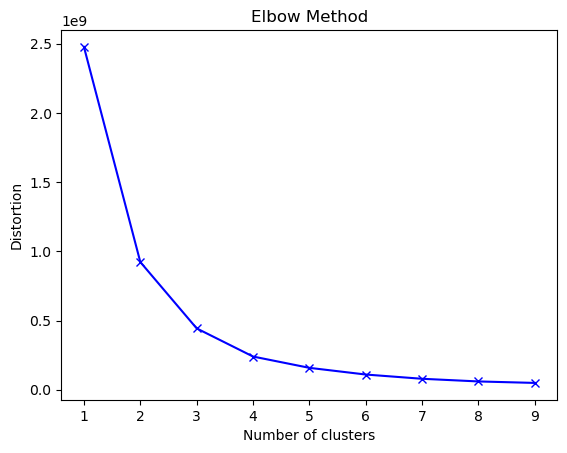

In [89]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(df_numeric)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


In [90]:
# Fit the k-means algorithm
kmeans = KMeans(n_clusters=3,random_state=42)
C_labels = kmeans.fit_predict(scaled_df_num)
# Get the class labels
y_true = df['Genre']

In [91]:
# CaLcuLate the v-measure score
v_measure = v_measure_score(y_true, C_labels) 
print(f'External Evaluation Measures') 
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# CaLcuLate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels) 
print(f'Rand Index Score: {rand_index:.3f}')
# CaLcuLate the mutuaL information score 
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# CaLcuLate the Davies-BouLdin index 
db_score = davies_bouldin_score(scaled_df_num, C_labels)
print(f'Internal Evaluation Measures') 
print(f'********************************') 
print(f'Davies-Bouldin Index: {db_score:.3f}')
# CaLcuLate the SiLhouette coefficient 
s_score = silhouette_score(scaled_df_num, C_labels) 
print(f'Silhouette Coefficient: {s_score: f}')


External Evaluation Measures
********************************
V-measure Score: 0.018
Rand Index Score: 0.002
Mutual Information Score: 0.018

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.499
Silhouette Coefficient:  0.360513


### The above employed k means will be execueted 3 times by changing groups with 'Rating', 'Genre' and 'Platform'

In [92]:
# Form groups using k-means clustering
df_numeric = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'Genre', 'Critic_Count','User_Score','User_Count','Platform', 'Rating']]

scaler = StandardScaler() # instantiate an object of the StandardScaLer() cLass 
scaled_df_num=scaler.fit_transform(df_numeric)

# Fit the k-means algorithm
kmeans = KMeans(n_clusters=3,random_state=42) 
C_labels = kmeans.fit_predict(scaled_df_num)
# Get the true cLass LabeLs
y_true = df['Platform']


In [93]:
# CaLcuLate the v-measure score
v_measure = v_measure_score(y_true, C_labels) 
print(f'External Evaluation Measures') 
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# CaLcuLate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels) 
print(f'Rand Index Score: {rand_index:.3f}')
# CaLcuLate the mutuaL information score 
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# CaLcuLate the Davies-BouLdin index 
db_score = davies_bouldin_score(scaled_df_num, C_labels)
print(f'Internal Evaluation Measures') 
print(f'********************************') 
print(f'Davies-Bouldin Index: {db_score:.3f}')
# CaLcuLate the Silhouette coefficient 
s_score = silhouette_score(scaled_df_num, C_labels) 
print(f'Silhouette Coefficient: {s_score:.3f}' )


External Evaluation Measures
********************************
V-measure Score: 0.034
Rand Index Score: 0.007
Mutual Information Score: 0.033

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.499
Silhouette Coefficient: 0.361


In [94]:
# Form groups using k-means clustering
df_numeric = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'Genre', 'Critic_Count','User_Score','User_Count','Platform', 'Rating']]

scaler = StandardScaler() # instantiate an object of the StandardScaLer() cLass 
scaled_df_num=scaler.fit_transform(df_numeric)

# Fit the k-means algorithm
kmeans = KMeans(n_clusters=3,random_state=42) 
C_labels = kmeans.fit_predict(scaled_df_num)
# Get the true cLass LabeLs
y_true = df['Rating']

In [95]:
# CaLcuLate the v-measure score
v_measure = v_measure_score(y_true, C_labels) 
print(f'External Evaluation Measures') 
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# CaLcuLate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels) 
print(f'Rand Index Score: {rand_index:.3f}')
# CaLcuLate the mutuaL information score 
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# CaLcuLate the Davies-BouLdin index 
db_score = davies_bouldin_score(scaled_df_num, C_labels)
print(f'Internal Evaluation Measures') 
print(f'********************************') 
print(f'Davies-Bouldin Index: {db_score:.3f}')
# CaLcuLate the Silhouette coefficient 
s_score = silhouette_score(scaled_df_num, C_labels) 
print(f'Silhouette Coefficient: {s_score:.3f}' )


External Evaluation Measures
********************************
V-measure Score: 0.126
Rand Index Score: 0.238
Mutual Information Score: 0.125

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.499
Silhouette Coefficient: 0.361


In [96]:
# Form groups using k-means clustering
df_numeric = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'Genre', 'Critic_Count','User_Score','User_Count','Platform', 'Rating']]

scaler = StandardScaler() # instantiate an object of the StandardScaLer() cLass 
scaled_df_num=scaler.fit_transform(df_numeric)

# Fit the k-means algorithm
kmeans = KMeans(n_clusters=3,random_state=42) 
C_labels = kmeans.fit_predict(scaled_df_num)
# Get the true cLass LabeLs
y_true = df['Genre']

In [97]:
# CaLcuLate the v-measure score
v_measure = v_measure_score(y_true, C_labels) 
print(f'External Evaluation Measures') 
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# CaLcuLate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels) 
print(f'Rand Index Score: {rand_index:.3f}')
# CaLcuLate the mutuaL information score 
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# CaLcuLate the Davies-BouLdin index 
db_score = davies_bouldin_score(scaled_df_num, C_labels)
print(f'Internal Evaluation Measures') 
print(f'********************************') 
print(f'Davies-Bouldin Index: {db_score:.3f}')
# CaLcuLate the Silhouette coefficient 
s_score = silhouette_score(scaled_df_num, C_labels) 
print(f'Silhouette Coefficient: {s_score:.3f}' )

External Evaluation Measures
********************************
V-measure Score: 0.018
Rand Index Score: 0.002
Mutual Information Score: 0.018

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.499
Silhouette Coefficient: 0.361
